<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/pre_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np 
import pandas as pd 
import os
import sys
import shutil   
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import LeakyReLU
import tensorflow as tf

In [3]:
data_dir = "/content/drive/MyDrive/Dataset_epiliptic_seizure/"
num_classes = 2

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

In [103]:
batch_size = 16
learning_rate = 0.0001
epoch = 50


In [11]:
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split = 0.2
)

train_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (125,125),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    subset = 'training',
    class_mode = 'binary'
)

valid_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (125,125),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    subset = 'validation',
    class_mode = 'binary'

)

Found 498 images belonging to 2 classes.
Found 123 images belonging to 2 classes.


In [86]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(125,125,3),
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [87]:
from tensorflow import keras

In [91]:
resnet_model.add(keras.layers.Flatten())
resnet_model.add(keras.layers.Dense(128,activation = 'relu'))
resnet_model.add(keras.layers.Dense(2,activation='softmax'))

In [92]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
 dense_4 (Dense)             (None, 256)               768       
                                                                 
 dense_5 (Dense)             (None, 128)              

In [102]:
from tensorflow.keras.optimizers import Adam
resnet_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(lr = learning_rate),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [104]:
history = resnet_model.fit(train_gen, validation_data=valid_gen, epochs=epoch)

Epoch 1/50
17/17 [==============================] - 38s 2s/step - loss: 0.6928 - accuracy: 0.4900 - val_loss: 0.6911 - val_accuracy: 0.4959
Epoch 2/50
17/17 [==============================] - 34s 2s/step - loss: 0.6759 - accuracy: 0.7329 - val_loss: 0.6769 - val_accuracy: 0.6341
Epoch 3/50
17/17 [==============================] - 34s 2s/step - loss: 0.6272 - accuracy: 0.9458 - val_loss: 0.6472 - val_accuracy: 0.7073
Epoch 4/50
17/17 [==============================] - 34s 2s/step - loss: 0.5560 - accuracy: 0.9578 - val_loss: 0.6194 - val_accuracy: 0.7154
Epoch 5/50
17/17 [==============================] - 34s 2s/step - loss: 0.4843 - accuracy: 0.9598 - val_loss: 0.6054 - val_accuracy: 0.6992
Epoch 6/50
17/17 [==============================] - 36s 2s/step - loss: 0.4215 - accuracy: 0.9659 - val_loss: 0.5930 - val_accuracy: 0.7236
Epoch 7/50
17/17 [==============================] - 35s 2s/step - loss: 0.3641 - accuracy: 0.9659 - val_loss: 0.5912 - val_accuracy: 0.7154
Epoch 8/50
17/17 [==

In [105]:
resnet_model.evaluate(valid_gen)

5/5 [==============================] - 7s 1s/step - loss: 1.1353 - accuracy: 0.7398


[1.1353082656860352, 0.7398374080657959]

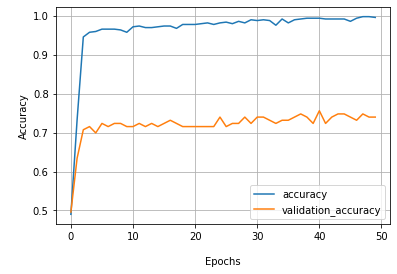

In [106]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.ylabel('\nAccuracy')
plt.xlabel('\nEpochs')
plt.grid()
plt.show()


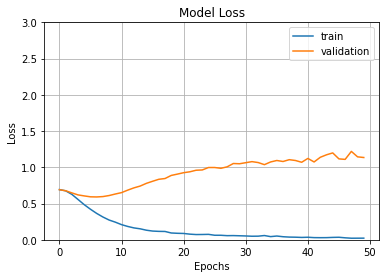

In [110]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=3)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [111]:
training_accuracy_resnet      = history.history['accuracy'][-1]
training_loss_resnet          = history.history['loss'][-1]
validation_accuracy_resnet    = history.history['val_accuracy'][-1]
validation_loss_resnet        = history.history['val_loss'][-1]


print("Training Accuracy ResNet   :", training_accuracy_resnet )
print("Training Loss ResNet       :", training_loss_resnet)
print("Validation Accuracy ResNet :", validation_accuracy_resnet)
print("Validation Loss ResNet     :", validation_loss_resnet)

Training Accuracy ResNet   : 0.9959839582443237
Training Loss ResNet       : 0.02263709157705307
Validation Accuracy ResNet : 0.7398374080657959
Validation Loss ResNet     : 1.1353081464767456


In [194]:
# Generating Confusion Matrix and Classification Report

Y_pred_res = resnet_model.predict_generator(valid_gen)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(valid_gen.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)

print('Classification Report')
target_names = ['Normal', 'Seizure']
class_rep_res = classification_report(valid_gen.classes, y_pred_res, target_names=target_names)
print(class_rep_res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
[[28 33]
 [11 51]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.72      0.46      0.56        61
     Seizure       0.61      0.82      0.70        62

    accuracy                           0.64       123
   macro avg       0.66      0.64      0.63       123
weighted avg       0.66      0.64      0.63       123

